# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

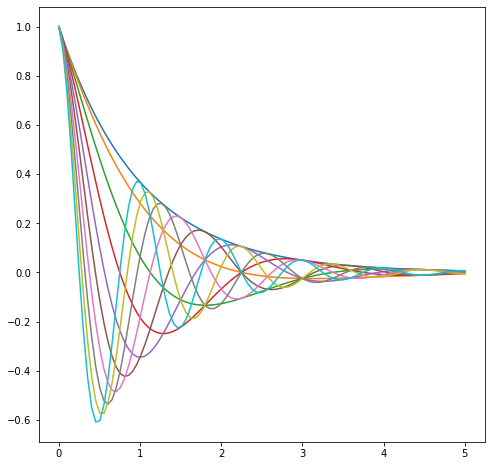

In [31]:
import numpy as np
import math
import matplotlib.pyplot as plt

thetas = np.linspace(0, 2, 10)
x_vals = np.linspace(0, 5, 100)

def gen_line_for(theta):
    return [math.cos(math.pi * theta * x)*math.exp(-x) for x in x_vals]

lines = [gen_line_for(theta) for theta in thetas]
line_num = 0
for line in lines:
    plt.plot(x_vals, line, label="line {ln}".format(ln=line_num))
    line_num += 1

plt.show()


# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

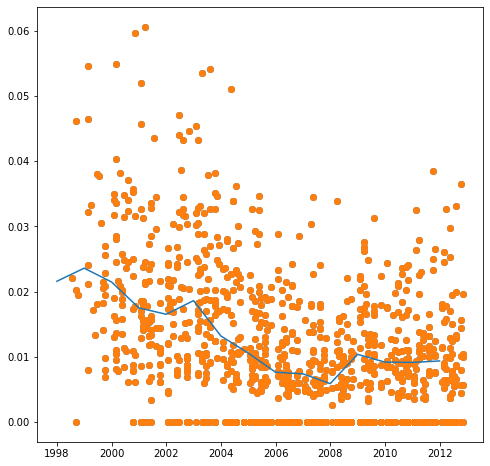

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/tennis.csv')
"""
We create a column that represent the year and month
as a float of a year
where the integer of the float is year
and the decimal is the month's number as a ratio of month / 13
We use 13 so that 12/12 (december) doesnt force the integer to go up by one
which would mean december of 2012 would produce 2013.0, which isnt the case
"""
def calc_dbl_faults(df):
    df['match_month'] = df['start date'].apply(lambda row: row.split('-')[1])
    df['plot_year'] = df.apply(
        lambda row: (float(row['match_month']) / 13.) + float(row['year']), 
        axis=1
    )
    df['dbl_faults_pm'] = df['player1 double faults'] / df['player1 total points total']

calc_dbl_faults(df)

plt.scatter(df['plot_year'], df['dbl_faults_pm'])

"""
Let's get the mean of each x value

"""
means = df.groupby(["year"])["dbl_faults_pm"].mean()

plt.scatter(df['plot_year'], df['dbl_faults_pm'])

plt.plot(df['year'].unique(), means.tolist())

plt.show()

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


   ticker     change        name
12    PTR -21.021255  PetroChina
7      BA   0.598604      Boeing
3     BHP  12.520560         BHP
2     IBM  14.048042         IBM
9      KO  15.212283   Coca-Cola
6    AMZN  16.706531      Amazon
4      TM  17.261986      Toyota
0    INTC  21.336670       Intel
10   GOOG  21.777538      Google
11    SNE  28.352939        Sony
8    QCOM  34.942764    Qualcomm
1    MSFT  35.878247   Microsoft
5    AAPL  46.221692       Apple


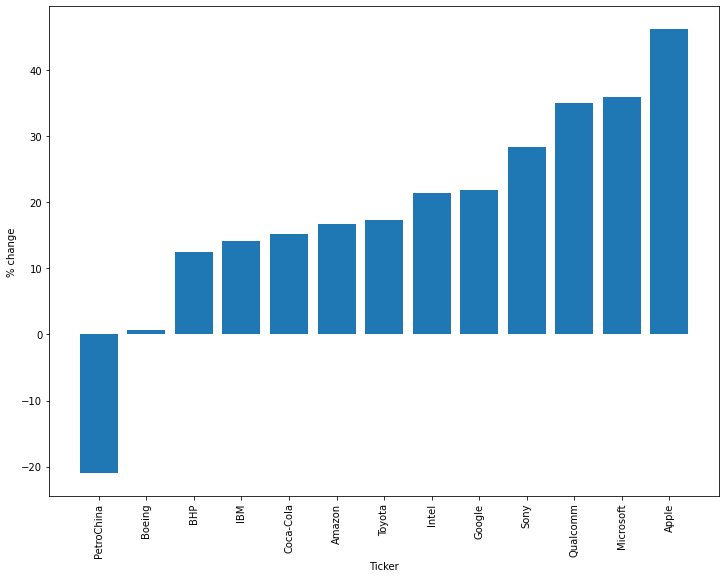

In [33]:
# !pip install --upgrade pandas_datareader
import datetime as dt
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
total_count = ticker['INTC'].count()

percents = pd.DataFrame({
    'ticker': ticker.columns
})

def add_labels(row): 
    return pd.Series({
        'change': ((ticker[row][total_count-1] - ticker[row][0]) / ticker[row][total_count-1]) * 100,
        'name': ticker_list[row]
    })

percents = percents.merge(percents.ticker.apply(add_labels),left_index=True, right_index=True)


percents = percents.sort_values(by=['change'])
print(percents)
plt.rcParams["figure.figsize"] = (12, 9)
plt.bar(percents.name, height=percents['change'])
plt.xlabel('Ticker')
plt.ylabel('% change')
plt.xticks(rotation=90)
plt.show()

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

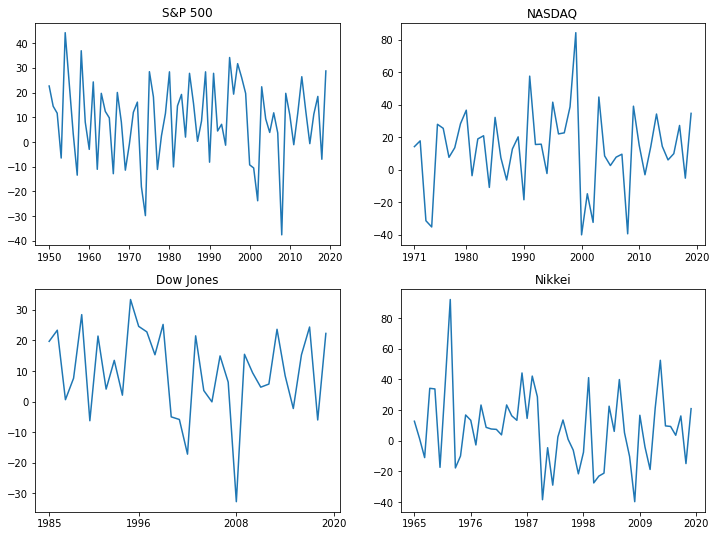

In [34]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

# start=dt.datetime(2019, 1, 2)
def create_plots(end=dt.datetime(2020, 1, 2)):
    indexes = read_data(indices_list, start=dt.datetime(1950, 1, 1), end=end)
    """
    Data cleanup
    """
    indexes = indexes.fillna(0.0)
    indexes = indexes.replace("NaN",0.0)
    indexes['year'] = indexes.apply(lambda row: str(row.name).split('-')[0], axis=1)
    years = indexes['year'].unique()
    plots = [(key, indices_list[key]) for key in indices_list.keys()]
    n_rows = 2
    grid = list(chunks(plots, n_rows))
    
    for i in range(0, len(plots)):
        plot = plots[i]
        df = pd.DataFrame({
            'year': years
        })
        
        def get_values(row):
            mask = (indexes.index.get_level_values(0).year.isin([int(row)])) & (indexes[plot[0]] != 0.)
            year_entries = indexes[mask]
            """
            If DF is empty post filtering,
            return a 0 change year
            """
            if year_entries.empty:
                return pd.Series({
                    'change': 0.0
                })
            first_day = year_entries.index.min()
            last_day = year_entries.index.max()
            first_day_value = indexes.loc[first_day, plot[0]]
            last_day_value = indexes.loc[last_day, plot[0]]
            change = ((last_day_value - first_day_value) / first_day_value) * 100
            return pd.Series({
                'change': change
            })
        
        df = df.merge(df.year.apply(get_values), left_index=True, right_index=True)
        non_zeros = df[df['change'] != 0]
        plt.subplot(len(grid), n_rows, i + 1)
        plt.plot(non_zeros.year, non_zeros.change)
        step = math.floor((int(non_zeros.year.max()) - int(non_zeros.year.min())) / 8)
        ticks = [str(int(tick)) for tick in np.linspace(int(non_zeros.year.min()), 2020, step)]
        plt.xticks(ticks)
        plt.title(plot[1])
        
    plt.show()
    
    
create_plots()

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

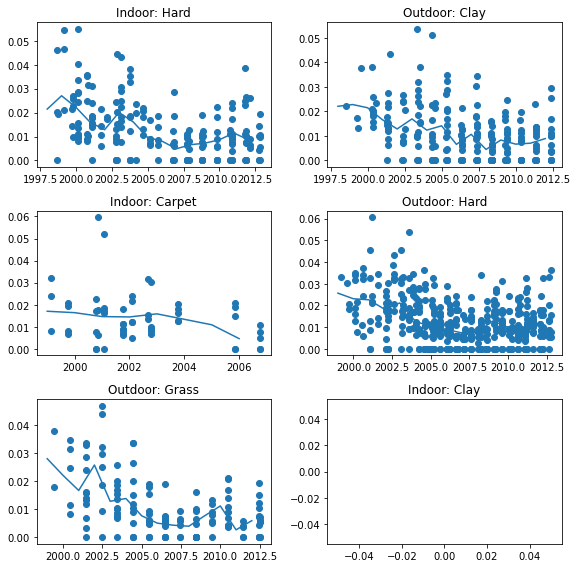

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Helps us build a subplot grid
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# From exercise 2
calc_dbl_faults(df)

surfaces = df.surface.unique()
n_rows = 2
surf_grid = list(chunks(surfaces, n_rows))

for i in range(len(surfaces)):
    field = surfaces[i]
    df_field = df[df.surface == field]
    means = df_field.groupby(["year"])["dbl_faults_pm"].mean()
    
    plt.subplot(len(surf_grid), n_rows, i + 1)
    plt.scatter(df_field['plot_year'], df_field['dbl_faults_pm'])
    plt.plot(df_field['year'].unique(), means.tolist())
    plt.title(field)

plt.rcParams["figure.figsize"] = (8,8)
plt.tight_layout()
plt.show()

    
